# Relationship between In-Demand Skills and Salary Levels for Data Scientists in Europe: An Analysis

This notebook examines how specific in-demand skills correlate to salary levels among Data Scientist job postings across Europe. By aggregating salary data by individual skills and visualizing both the highest paid and the most in-demand skills, we gain insights into how technical expertise affects earning potential.

## Chapter 1: Environment Setup and Data Acquisition

In this section, we import the necessary libraries, define configuration parameters, and load the dataset.

In [1]:
from helper_scripts.prepare_dataframe import get_european_dataframe
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Parameter: number of top skills to display
TOP_SKILLS = 10

*We begin by establishing the computational environment and loading our comprehensive European job market dataset.*

## Chapter 2: Data Preparation and Extraction of Salary Metrics

Next, we filter the dataset to focus solely on Data Scientist roles and exclude records that lack salary information. Then, we explode the `job_skills` column to allow a skill-by-skill analysis.

In [2]:
# Load the data and focus on Data Scientist roles only
ds_df = get_european_dataframe()
ds_df = ds_df[ds_df["job_title_short"] == "Data Scientist"].copy()

# Exclude records missing salary information
ds_df = ds_df.dropna(subset=["salary_year_avg"])

# Explode the 'job_skills' column so that each skill is in its own row
ds_df = ds_df.explode("job_skills")

*With these steps, we ensure that our analysis targets positions with complete salary data and that each skill is evaluated individually.*

## Chapter 3: Aggregation of Salary Metrics by Skill

We then aggregate salary-related metrics to determine both the highest paid skills and the most in-demand skills. The aggregation is based on the median salary and the frequency (job counts) associated with each skill.

In [3]:
# Highest paid skills: sort skills by median salary (descending order)
highest_paid_skills = (
    ds_df.groupby("job_skills")
    .agg(
         job_counts=("salary_year_avg", "count"),
         median_salary=("salary_year_avg", "median")
    )
    .sort_values(by="median_salary", ascending=False)
    .head(TOP_SKILLS)
)

# Most in-demand skills: sort skills by job counts first, then by median salary for clarity
most_in_demand_skills = (
    ds_df.groupby("job_skills")
    .agg(
         job_counts=("salary_year_avg", "count"),
         median_salary=("salary_year_avg", "median")
    )
    .sort_values(by="job_counts", ascending=False)
    .head(TOP_SKILLS)
    .sort_values(by="median_salary", ascending=False)
)

*This dual-aggregation approach helps us compare which skills are associated with higher pay and which ones are most frequently requested by employers.*

## Chapter 4: Visualization: Side-by-Side Comparison of Salary Metrics

To offer a clear comparison, we create side-by-side bar charts highlighting the highest paid skills and the most in-demand skills among Data Scientists.

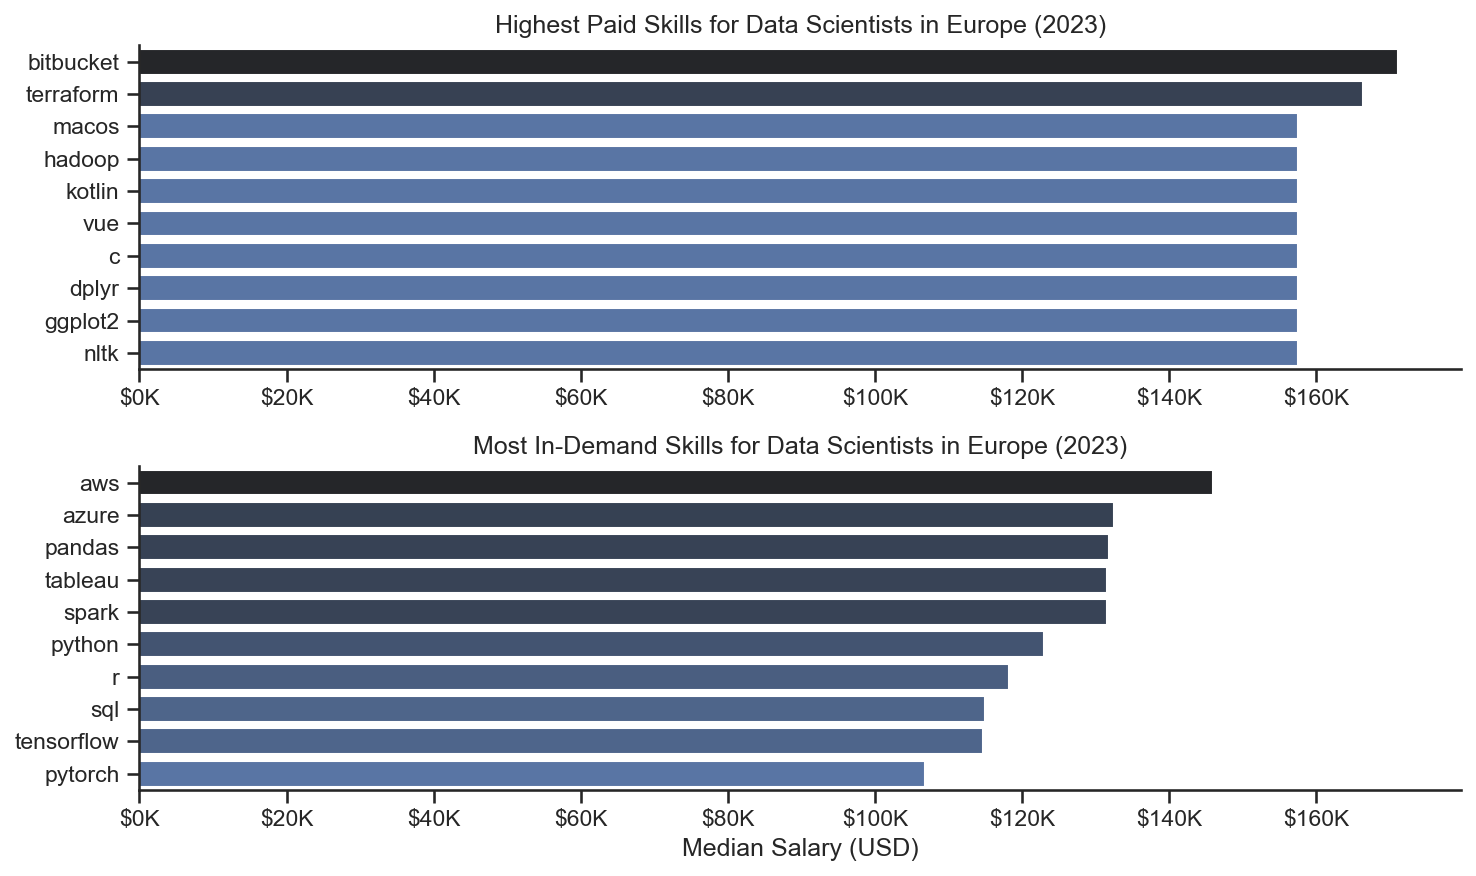

In [6]:
fig, axes = plt.subplots(2, 1, figsize=(10, 6), dpi=150)
sns.set_theme(style="ticks")

# Plot 1: Highest Paid Skills
sns.barplot(
    data=highest_paid_skills,
    x="median_salary", 
    y=highest_paid_skills.index,
    hue="median_salary", 
    palette="dark:b_r",
    ax=axes[0]
)
axes[0].set_title("Highest Paid Skills for Data Scientists in Europe (2023)")
axes[0].set_xlabel("")
axes[0].set_ylabel("")
axes[0].legend().remove()
axes[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${int(x/1000)}K"))

# Plot 2: Most In-Demand Skills
sns.barplot(
    data=most_in_demand_skills,
    x="median_salary", 
    y=most_in_demand_skills.index,
    hue="median_salary", 
    palette="dark:b_r",
    ax=axes[1]
)
axes[1].set_title("Most In-Demand Skills for Data Scientists in Europe (2023)")
axes[1].set_xlabel("Median Salary (USD)")
axes[1].set_ylabel("")
# Ensure consistent x-axis limits between plots
axes[1].set_xlim(axes[0].get_xlim())
axes[1].legend().remove()
axes[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${int(x/1000)}K"))

sns.despine()
plt.tight_layout()
plt.show()

*The upper plot illustrates the skills associated with the highest median salaries, while the lower plot shows the most frequently requested skills, ordered by median salary for clarity.*

## Chapter 5: Insights and Discussion

The analysis provides the following key insights into the relationship between in-demand skills and salary levels for Data Scientists:

### Highest Paid Skills
- **Specialized Development and Deployment Tools:**  
  Data scientists proficient in tools such as **Bitbucket** (median salary of approximately €171K) and **Terraform** (median of around €166K) command a significant salary premium. These tools, often tied to code collaboration and infrastructure management, underscore how blending data science with advanced development operations can lead to higher earnings.
  
- **Consistent Premium for Niche Technologies:**  
  Other specialized skills including **MacOS, Hadoop, Kotlin, Vue, C, dplyr, ggplot2, and nltk** typically offer a median salary close to €157,500. This uniformity suggests that expertise in these less common tools is highly valued in the market.

### Most In-Demand Skills
- **Core Data Science and Cloud Skills:**  
  Widely requested skills such as **AWS** and **Azure** have median salaries around €146K and €132.5K, respectively. Their prominence in job postings highlights the industry's dependence on robust cloud platforms to support scalable data solutions.
  
- **Foundational Tools:**  
  Traditional languages and libraries—like **Python (median ~€123K), SQL (≈€115K), R (≈€118K), Pandas, Tableau, and Spark**—appear frequently. Despite their high demand, these skills tend to command slightly lower salaries, generally ranging from about €107K to €123K. Their ubiquity, however, reinforces their status as essential components of the data science toolkit.

### Summary
*The analysis reveals a clear compensation gap. While core data science and cloud technologies are essential and widely demanded, professionals who broaden their expertise into niche or specialized technical areas are rewarded with a notable salary premium. This differentiation is valuable for data scientists aiming to advance their careers and secure unique, lucrative roles in the competitive European job market.*

## Final Remarks

By exploring the relationship between in-demand skills and salary levels, this notebook offers a strategic perspective on how technical competencies influence earning potential. Decision-makers and professionals alike can utilize these insights to prioritize skill development and better negotiate compensation in a rapidly evolving industry landscape.